# Diabetes Project

## Introduction to the Dataset
The data for this project comes from the 2015 Behavioral Risk Factor Surveillance System, a health-related telephone survey conducted annually in the United States by the CDC. The full survey contains responses to 330 questions from over 400,000 people. This dataset is a cleaned subset of the full BRFSS survey, containing the responses to 22 questions identified as potential risk factors for diabetes. It contains the following features:

- Diabetes_binary: 0 = no diabetes, 1 = diabetes or prediabetes
- HighBP: high blood pressure (binary: 0 = no, 1 = yes)
- HighChol: high cholesterol (binary)
- CholCheck: Have you had a cholesterol check in the past 5 years? (binary)
- BMI: Body Mass Index
- Smoker: Have you smoked at least 100 cigarettes in your entire life? (binary)
- Stroke: Have you ever had a stroke? (binary)
- HeartDiseaseorAttack: Reported having heart disease or myocardial infarction (binary)
- PhysActivity: Engaged in physical activity in the past 30 days (not including job) (binary)
- Fruits: Consume fruit at one or more times per day (binary)
- Veggies: Consume vegetables one or more times per day (binary)
- HvyAlcoholConsumption: Heavy alcohol consumption (adult men: more than 14 drinks per week and adult women: more than 7 drinks per week) (binary)
- AnyHealthCare: Have any kind of health care coverage (binary)
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (binary)
- GenHlth: Would you say that in general your health is: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
- MentHlth: For how many days during the past 30 days was your mental health not good (including stress, depression, and problems with emotions)? (0-30)
- PhysHlth: For how many days during the past 30 days was your physical health not good (including physical illness and injury)? (0-30)
- DiffWalk: Do you have serious difficulty walking or climbing stairs? (binary)
- Sex: 0 = female, 1 = male
- Age: Fourteen-level age category:  
    1 = 18-24  
	2 = 25-29  
	3 = 30-34  
	4 = 35-39  
	5 = 40-44  
	6 = 45-49  
	7 = 50-54  
	8 = 55-59  
	9 = 60-64  
	10 = 65-69  
	11 = 70-74  
	12 = 75-79  
	13 = 80+
- Education: What is the highest grade or year of school you completed?  
    1 = Never attended school or only kindergarten  
	2 = Grades 1 through 8 (elementary)  
	3 = Grades 9 through 11 (some high school)  
	4 = Grade 12 or GED (high school graduate)  
    5 = College 1-3 years (some college or technical school)  
    6 = College 4 years or more (college graduate)
- Income: Annual household income scale  
	1 = Less than 10,000  
	2 = 10,000-14,999  
	3 = 15,000-19,999  
    4 = 20,000-24,999 
    5 = 25,000-34,999  
    6 = 35,000-49,999  
    7 = 50,000-74,999  
    8 = 75,000 or more

The dataset is from [Kaggle](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset). I used the [BRFSS 2015 Codebook](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf) to interpret the age, education, and income scales.

## Data Question
Can we make a model to predict whether a person has diabetes based on the risk factors included in the dataset? Which factors are most predictive?

## Exploratory Data Analysis

In [1]:
# import libraries required
import numpy as np
import pandas as pd
import seaborn as sns

# import model
from sklearn.ensemble import RandomForestClassifier

# import evaluation functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# matplotlib for plotting modification
import matplotlib.pyplot as plt
%matplotlib inline

# scikitplot to directly plot our results
import scikitplot as skplt

In [68]:
# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators.csv')

In [9]:
# Look at the first 5 rows to get an idea of what the data looks like
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
# Get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

There are 253,680 rows of data. There are no missing values.

### Summary Statistics
Let's start with the target variable and get a count of the number of people with and without diabetes.

In [69]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

**This is not a balanced dataset:**  218,334 people surveyed do not have diabetes or prediabetes, while 35,346 people do. This approximately an 86%-14% split.

Most of the columns are binary: either a true(1)/false(0), or a number representing a category. Let's take a look at some statistics for the non-binary columns.

In [11]:
df_non_bool = df[['BMI', 'GenHlth', 'PhysHlth', 'MentHlth', 'Age', 'Education', 'Income']]
df_non_bool.describe()

,BMI,GenHlth,PhysHlth,MentHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,4.242081,3.184772,8.032119,5.050434,6.053875
std,6.608694,1.068477,8.717951,7.412847,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,3.000000,2.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


##### Body Mass Index:

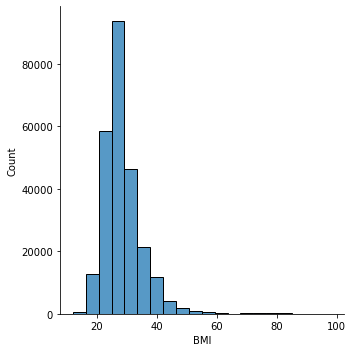

In [13]:
# Histogram of BMI
sns.displot(df, x='BMI', bins=20)

- BMI ranges from 12 to 98, with a mean of 28.4
- The distribution is positively skewed. 75% of the people have a body mass index under 31, but there are some very high outliers, all the way up to 98. (For context, a BMI of 30 or more is in the obese category.) 

##### General Health:

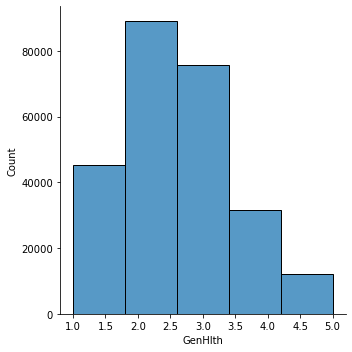

In [18]:
# Histogram of General Health
sns.displot(df, x='GenHlth', bins=5)

- Measured on a scale of 1-5, with 1 = excellent, 5 = poor
- Most people report being in good (3) to excellent (1) health, with very good (2) being the most common response.

##### Physical Health:

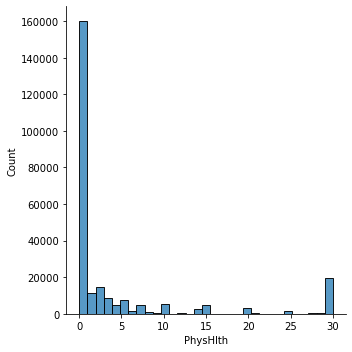

In [20]:
# Histogram of Physical Health
sns.displot(df, x='PhysHlth', bins=31)

- Well over half the respondents indicated that they experienced no days of illness or injury in the past 30 days.
- The next most common response was that they experienced poor physical health on all 30 days.
- The mean is 4.2 days of poor physical health, but the standard deviation is very high because of the unusual distribution.

##### Mental Health:

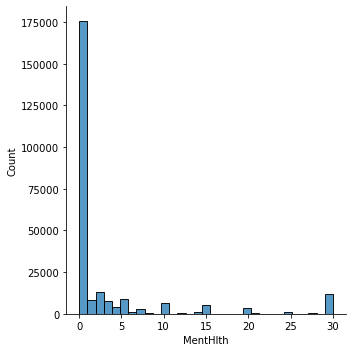

In [21]:
# Histogram of Mental Health
sns.displot(df, x='MentHlth', bins=31)

- Over two-thirds of the respondents indicated that they experienced no days of poor mental health in the past 30 days.
- The mean is 3.2 days of poor mental health, but the standard deviation is very high because of the unusual distribution.

##### Age:

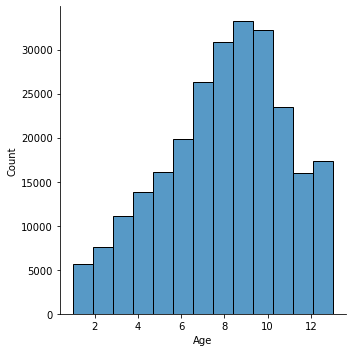

In [22]:
# Histogram of Age
sns.displot(df, x='Age', bins=13)

- Age is measured on a scale from 1-13, where each number on the scale represents a 5-year increment, except for 1 = 18-24 years and 13 = 80+ years.
- Age is the most normally distributed characteristic, with a mean, median and mode of age category 8 (55-59 years old).

##### Education:

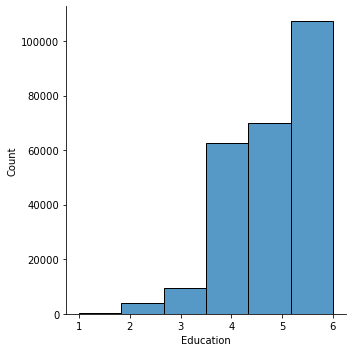

In [24]:
# Histogram of Education
sns.displot(df, x='Education', bins=6)

- Education is reported on a scale of 1-6 (see introduction)
- The distribution has a negative skew. The most common education category is 6, four or more years of college education. Over half of the people represented in this dataset have received at least 1 year of college education.
- The mean and median education category are both 5, one to three years of college education.

##### Household Income:

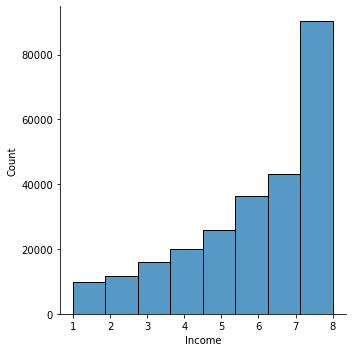

In [26]:
# Histogram of Income
sns.displot(df, x='Income', bins=8)

- Income is reported on a 8-point scale (see introduction). It is worth noting that the income brackets on the scale are not equal: categories 2, 3 and 4 have a 5000-dollar range, category 5 has a 10,000-dollar range, category 6 has a 15,000-dollar range, category 7 has a 25,000-dollar range, and category 8 is anything 75,000 dollars or more. 
- Therefore it's not surprising that over half the respondents in the dataset fall into the top two categories (household income of 50,000 dollars or more). The number of people in category 8 (75,000+ dollars) is over twice as many as the next category (7). The distribution has a negative skew.

### Correlation Analysis

<AxesSubplot:>

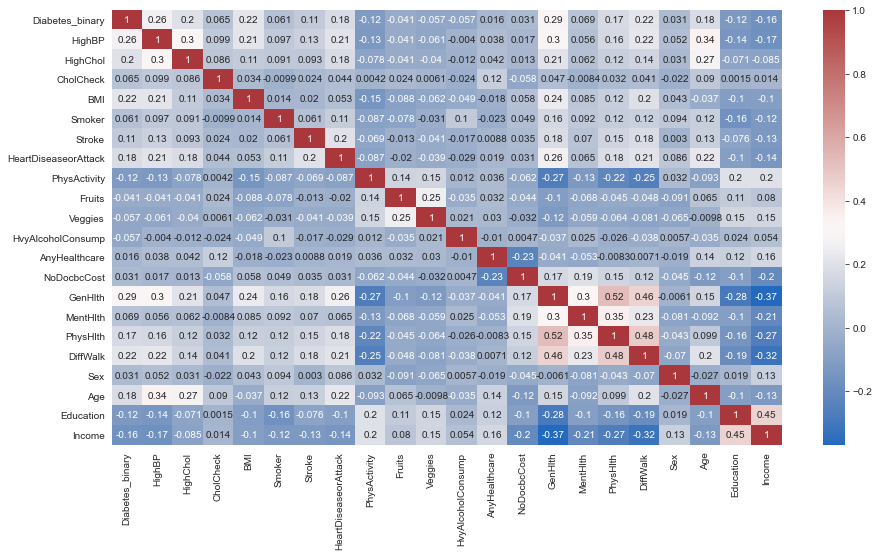

In [70]:
corr_analysis = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_analysis, annot=True, cmap='vlag')

The target feature, 'Diabetes_binary' doesn't have a very high correlation with any of the other features. The highest correlations (around 0.2-0.3) are with high blood pressure, high cholesterol, BMI, general health, and difficulty walking. General health correlates quite strongly with physical health, difficulty walking, and income. Education and income are also correlated.

## Modelling: Random Forest Classifier
Because of the binary nature of many of the variable in this dataset, the best classification model is probably Random Forest. Random Forest models tend to perform better on categorical data. Instead of trying multiple classification models, I will tune the hyperparameters of this one model to improve it.

The target variable, 'Diabetes_binary', should be a string (category) to use a classification model.

In [71]:
# Convert target variable to string
df['Diabetes_binary'] = df['Diabetes_binary'].astype(str)

Assign independent and dependent variables:

In [73]:
# Identify the independent and dependent variables
X = df.drop(labels='Diabetes_binary', axis=1)
y = df['Diabetes_binary']

Split the data into a training set (70% of the data) and a test set (30% of the data):

In [74]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

Initialize and fit the model with the training set. Use the model to predict with the test set and find the accuracy score:

In [75]:
# Initialize the random forest model
rf = RandomForestClassifier(n_estimators=10, random_state=78)
# Fit the model
rf.fit(X_train, y_train)

# Use the model to predict
y_pred = rf.predict(X_test)

# Find accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8530300641227794


This accuracy score is good. Let's see if we can make it better with hyperparameter tuning. I will create a validation set to use for choosing the optimal number for n_estimators so that I don't add bias and overfit the data to the test set.

In [76]:
# Make a validation set that is half of the test set.
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=78)
X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5, random_state=78)

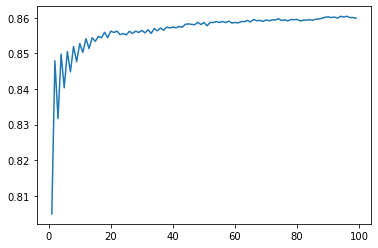

In [32]:
# Test between 1 and 100 trees
numberoftrees = range(1, 100)
# Create an empty list to hold the accuracy scores
acc_scores = []

# Create a for loop to run the random forest model with 1-100 trees and append the accuracy scores in the list acc_scores
for n in numberoftrees:
    # In n_estimators, test all the values found in the range (1, 100)
    rf = RandomForestClassifier(n_estimators=n, random_state=78)
    # Fit the model
    rf.fit(X_train, y_train)
    # Predict using the validation set
    y_pred = rf.predict(X_val)
    # Append the result to acc_scores list using validation set
    acc_scores.append(accuracy_score(y_val, y_pred))

# Plot the accuracy score results
plt.plot(numberoftrees, acc_scores)

It looks like the accuracy maxes out around 86% for around 96 trees. Let's re-run the model with n_estimators = 96.

In [77]:
# Re-initialize the model with 96 trees
rf = RandomForestClassifier(n_estimators=96, random_state=78)
# Fit the model
rf.fit(X_train, y_train)

# Use the model to predict using the test set
y_pred = rf.predict(X_test)

### Evaluate the Model
##### Accuracy Score:

In [78]:
# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.858483128350678


##### Classification Report:

In [79]:
# Print evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     32680
         1.0       0.50      0.17      0.25      5372

    accuracy                           0.86     38052
   macro avg       0.69      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052



##### Confusion Matrix:

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

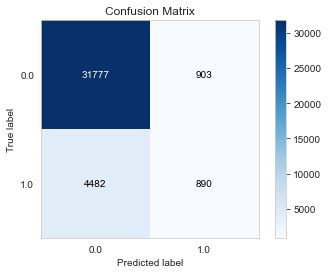

In [80]:
# Visualize with a confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

##### Evaluation:
The model's accuracy score is 86%, which sounds pretty good. However, if we dig deeper, we see that there are some major issues. The model is good at classifying people who do not have diabetes correctly as 0, with an f1-score of 92%. However, it is terrible at classifying people who actually do have diabetes correctly as 1: it only detects 17% of those who actually have diabetes, meaning there are many false negatives. The f1-score for the 1 class (those who have diabetes) is only 25%. The accuracy score is only high because there are so many more people without diabetes in the dataset.

### Tune the Hyperparameter class_weight
The model's poor ability to recognize those with diabetes may be because the dataset is unbalanced: only 13.9% of the people have diabetes or prediabetes. In the model, the support of the 1 class is only 5372, as opposed to a support of 32,680 for the 0 class. The model favours the larger group.

I will try to find an optimal class_weight for the RandomForestClassifier to fix this problem. To do this, I will use GridSearch to test weights from 0 to 0.99 for my classes.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\lorie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

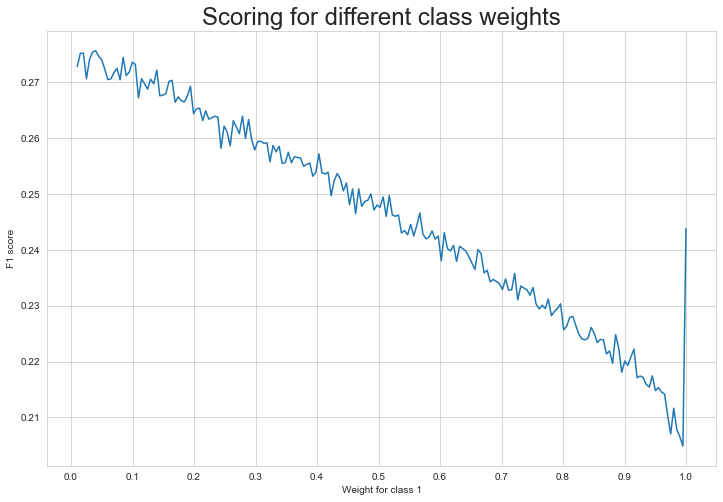

In [52]:
# Set the range for class weights between 0 and 0.99, going up by 0.005 (200 candidates)
weights = np.linspace(0.0,0.99,200)

# Create a dictionary grid with a for loop to go through all values in weights (above) for grid search 
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# Fit grid search to the train data with 5 folds (default for StratifiedKFold) - combines cross-validation with hyperparameter tuning
# Use f1 score to evaluate the performance of the model
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv=StratifiedKFold(), n_jobs=-1, scoring='f1', verbose=2).fit(X_train, y_train)

# Plot the f1 score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1 - weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Unfortunately, this graph shows that there is no optimal weight for class 1 to improve the f1 score. The f1 score continually decreases as we increase the weight of class 1. Changing the weight of the classes will not improve the model's ability to detect diabetes from the indicators in the dataset.

## Balanced Dataset
There is a balanced dataset available on Kaggle using a subset of the original data. I will try using this dataset to see if I can get a better model.

In [53]:
# Load balanced data
df_bal = pd.read_csv('diabetes_binary_5050split_health_indicators.csv')

In [55]:
# Check number of 0s and 1s in dataset
df_bal['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [56]:
# Convert target variable to string
df_bal['Diabetes_binary'] = df_bal['Diabetes_binary'].astype(str)

### Random Forest Model... Again

In [57]:
# Identify the independent and dependent variables for the new dataset
X = df_bal.drop(labels='Diabetes_binary', axis=1)
y = df_bal['Diabetes_binary']

In [58]:
# Make a training set (70% of the data), a validation set (15%) and a test set (15%)
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=78)
X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5, random_state=78)

Re-tune n_estimators for this dataset:

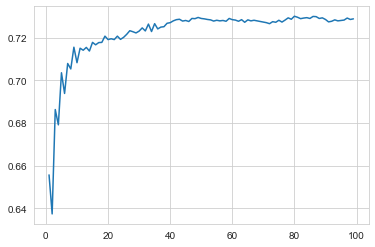

In [62]:
# Test between 1 and 100 trees
numberoftrees = range(1,100)
# Create an empty list to hold the accuracy scores
acc_scores_bal = []

# Create a for loop to run the random forest model with 1-100 trees and append the accuracy scores in the list acc_scores_bal
for n in numberoftrees:
    # In n_estimators, test all the values found in the range (1,100)
    rf = RandomForestClassifier(n_estimators=n, random_state=78)
    # Fit the model
    rf.fit(X_train, y_train)
    # Predict using the validation set
    y_pred = rf.predict(X_val)
    # Append the accuracy scores (found with validation set) to acc_scores_bal list
    acc_scores_bal.append(accuracy_score(y_val, y_pred))

# Plot the accuracy score results
plt.plot(numberoftrees, acc_scores_bal)

It appears that we get the best accuracy score for about 86 n_estimators.

In [63]:
# Initialize the model with 86 trees
rf = RandomForestClassifier(n_estimators=86, random_state=78)
# Fit the model
rf.fit(X_train, y_train)

# Predict using the test set
y_pred = rf.predict(X_test)

### Evaluate the Model

In [64]:
# Print accuracy score and evaluation metrics
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7419841569219162
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74      5353
         1.0       0.72      0.77      0.75      5251

    accuracy                           0.74     10604
   macro avg       0.74      0.74      0.74     10604
weighted avg       0.74      0.74      0.74     10604



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

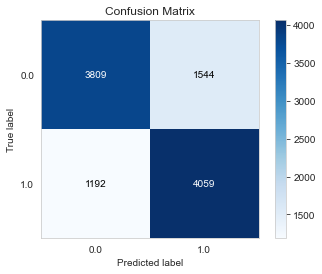

In [65]:
# Visualize with a confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Having balanced support for both classes made a HUGE difference! Though the overall accuracy of the model dropped from 86% to 74%, the model's ability to correctly predict diabetes in the people who actually do have it jumped from 17% to 77%! However, this model is more prone to false positives: predicting diabetes in those who don't have it. 

In this context, it is more important to classify those with diabetes correctly than it is to have a higher overall accuracy, so I choose this model as the best one.

## Answering the Question
### Can we make a model to predict whether a person has diabetes based on the risk factors included in the dataset?
The Random Forest Classifier with the balanced dataset predicts whether or not a person has diabetes or prediabetes with 74% accuracy. It correctly predicts the presence of diabetes in those who have the disease 77% of the time. Considering that this data comes from a telephone survey, not direct medical tests, I find these results quite impressive! It is not a substitute for a medical diagnosis, but if a person found themselves classified as having diabetes/prediabetes with this model, I would recommend seeing their doctor for diabetes testing.

### Which factors are most predictive in determining whether a person has diabetes?
#### Model Interpretation
Let's see which features are the most important in the model.

<AxesSubplot:title={'center':'Feature Importance'}>

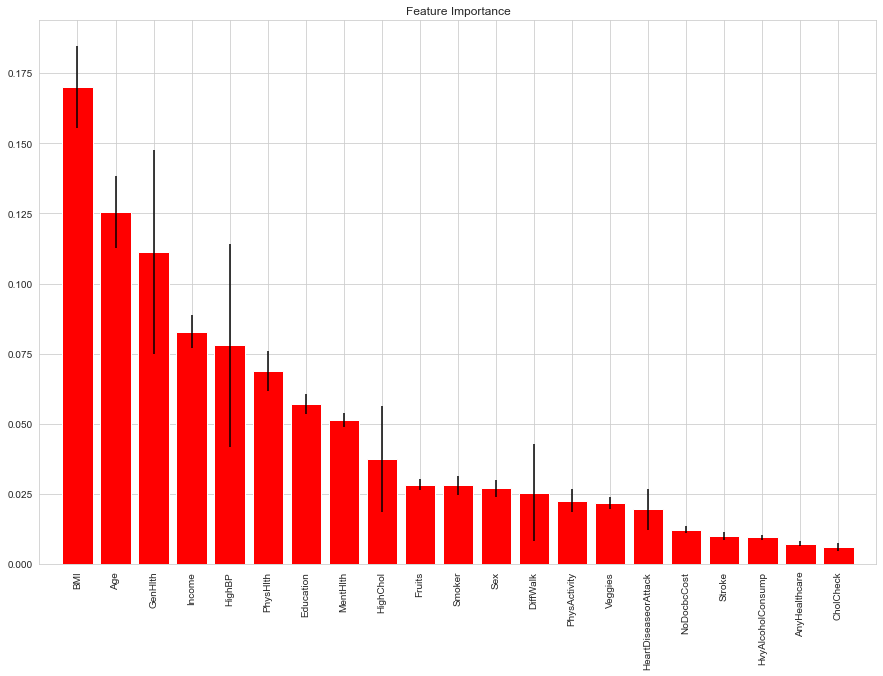

In [67]:
feature_names = X.columns
skplt.estimators.plot_feature_importances(rf, feature_names=feature_names, max_num_features=21, figsize=(15,10), x_tick_rotation=90)

The most important predictive feature in the model is BMI. Age and general health are also important features. However, these may be the most important simply because they are non-binary features and therefore have more variance. Of the binary features, high blood pressure is the most predictive indicator. The fact that it ranked higher than three of the non-binary features shows that it is quite significant.

Features that aren't very important in the model are: whether the person has had a cholesterol check in the past 5 years, having health care coverage, heavy alcohol consumption, having had a stroke, and choosing not to see a doctor because of the cost. (Note that these are all binary categories.) Of the non-binary categories, mental health has the least predictive value. 

I'm surprised that physical activity didn't rank higher in importance. However, it's probably because of the way the question was structured: If a person engaged in *any* physical activity over the past 30 days (other than for a job), that is indicated with a 1. This doesn't seem like a very descriptive way to measure a person's level of physical activity.

**For a deeper look into the relationships between these features and diabetes, please see my interactive Tableau dashboard [here](https://public.tableau.com/app/profile/lorien.mccomb/viz/DiabetesStatsandRiskFactors/Dashboard1?publish=yes).**

## Ethical Considerations
The dataset for this project does not contain any identifying information about the respondents, so I have no concerns about privacy.

It is important to emphasize that this model does not medically diagnose diabetes or prediabetes. It would be unethical to use the model in place of a true diagnosis. If the model predicts that a person has diabetes, I recommend seeing a doctor for proper medical testing. Also, this model misses 23% of true diabetes cases, so it should not be used to rule out the possibility that a person is diabetic/prediabetic.

This model does not imply that any of these features cause diabetes. (In fact some of the research I did indicates the opposite relationship: for example, diabetes can cause heart disease rather than the other way around.)